# ECG

#### Coleta: 15/10/2021
#### Tratamento: 16/10/2021
#### Simulador – 60 bpm

## Descrição

#### As medidas foram coletadas a partir do simulador ECG Medsystem Hospitalar. Os dados são coletados pelo sensor AD8232 e transmitidos via Bluetooth para o computador.

In [2]:
# Importando as bibliotecas
import heartpy as hp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Definindo a taxa de amostragem
sample_rate = 191

### Apresentação dos dados

In [5]:
with open('ecg_simulador_15-10_6.txt', newline = '') as db:                                                                                          
    db_reader = pd.read_csv(db, delimiter='\t', names=['Horário', 'Amplitude'])
    
db_reader = db_reader.dropna()
db_reader

,Horário,Amplitude
1,18:25:32.703,355.0
2,18:25:32.703,362.0
3,18:25:32.703,372.0
4,18:25:32.703,377.0
5,18:25:32.703,384.0
...,...,...
11647,18:26:33.104,420.0
11648,18:26:33.104,410.0
11649,18:26:33.104,419.0
11650,18:26:33.104,424.0


In [6]:
db_reader.dtypes

Horário       object
Amplitude    float64
dtype: object

In [7]:
seconds = db_reader['Horário'].map(lambda x: pd.to_timedelta(x).seconds)
seconds

1        66332
2        66332
3        66332
4        66332
5        66332
         ...  
11647    66393
11648    66393
11649    66393
11650    66393
11651    66393
Name: Horário, Length: 11651, dtype: int64

In [8]:
min = seconds.loc[seconds.first_valid_index()]
max = seconds.loc[seconds.last_valid_index()]
delta = max - min
delta

61

In [9]:
data = db_reader['Amplitude']

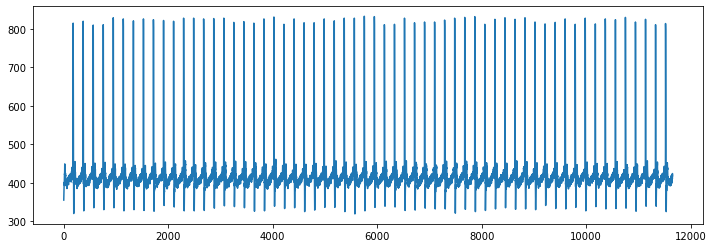

In [10]:
plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

bpm: 59.640116
ibi: 1006.034253
sdnn: 4.897558
sdsd: 5.145333
rmssd: 8.503512
pnn20: 0.034483
pnn50: 0.000000
hr_mad: 5.235602
sd1: 6.012553
sd2: 3.463908
s: 65.429718
sd1/sd2: 1.735772
breathingrate: 0.300000


C:\Users\Lucia\Anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 864x288 with 0 Axes>

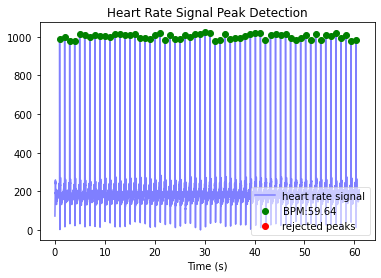

In [11]:
# Análise
wd, m = hp.process(hp.scale_data(data), sample_rate)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

# Mostrar as medidas computadas
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))